# TP OpenMP - October 2022
## Part 1 : Pi
### Compilation

In [1]:
!g++ -o binaries/tp_openmp_part_2_vector binaries/tp_openmp_part_2_vector.cpp -fopenmp -O3 -march=native
!g++ -o binaries/tp_openmp_part_2_vector_parallel binaries/tp_openmp_part_2_vector_parallel.cpp -fopenmp -O3 -march=native
!g++ -o binaries/tp_openmp_part_2_vector_simd binaries/tp_openmp_part_2_vector_simd.cpp -fopenmp -O3 -march=native

### Performance evaluation

In [1]:
N = [2, 4, 8, 10, 12, 14]
M = [1, 3, 7, 9, 11, 13]
algo_compare = ['Sequentiel', 'Parallel', 'Simd']

In [5]:
import os
import subprocess

try:
    os.remove("../vector_Stats.csv")
    f=open("../vector_Stats.csv","w+")
    f.write("version,N,M,runtime,problemSize,bandwith\n")
    f.close()
except OSError:
    pass

repeats = range(0,10)

for Ni in N:
    for repeat in repeats:
        args = ("binaries/tp_openmp_part_2_vector", "-N", str(Ni), "-M", str(Ni - 1), "-nrepeat", str(1))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

        args = ("binaries/tp_openmp_part_2_vector_parallel", "-N", str(Ni), "-M", str(Ni - 1), "-nrepeat", str(1))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()

        args = ("binaries/tp_openmp_part_2_vector_simd", "-N", str(Ni), "-M", str(Ni - 1), "-nrepeat", str(1))
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()



### Performance analysis
#### Weak scaling

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('../vector_Stats.csv',header=0,dtype={
                    'version': str,
                    'N': 'int64',
                    'M': 'int64',
                    'runtime': 'float64',
                    'problemSize': 'float64',
                    'bandwith': 'float64'
                 }
                 )


color_N = {2 : "blue", 4 : "red", 8 : "green", 10 : "black", 12 : "orange", 14 : "purple"}
color_algo = {"Sequentiel" : "blue", "Parallel" : "red", "Simd" : "green"}




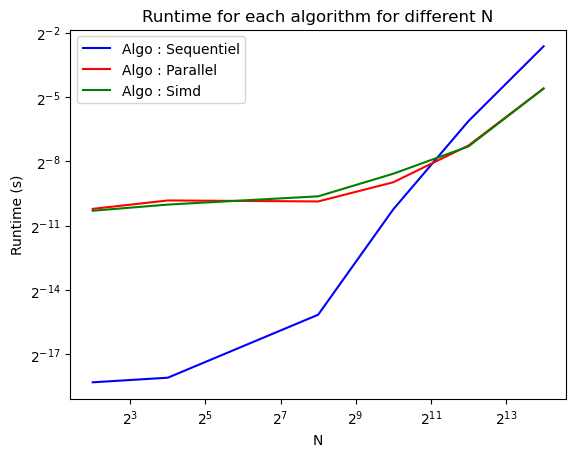

In [5]:
for algo in algo_compare:
    df_algo = df[df['version'] == algo]
    mean = df_algo.groupby(['N', "M"]).mean().reset_index()
    plt.plot(mean['N'], mean['runtime'], color=color_algo[algo], label="Algo : " + str(algo))
    
plt.legend()
plt.title("Runtime for each algorithm for different N")
plt.xlabel("N")
plt.ylabel("Runtime (s)")
plt.yscale('log', base=2)
plt.xscale('log', base=2)
plt.sh(ow)


Dans le graphique, nous observons que l'algorithme séquentiel offre une meilleure performance que l'algorithme parallèle lorsqu'il y a peu de données. Cela est dû au fait que le coût de la synchronisation est plus important que le gain de performance apporté par le parallélisme. Pour des plus grands volumes de données, le parallélisme permet d'obtenir une meilleure performance que l'algorithme séquentiel et nous n'observons pas de différence remarquable de performance entre les deux algorithmes de parallélisme.

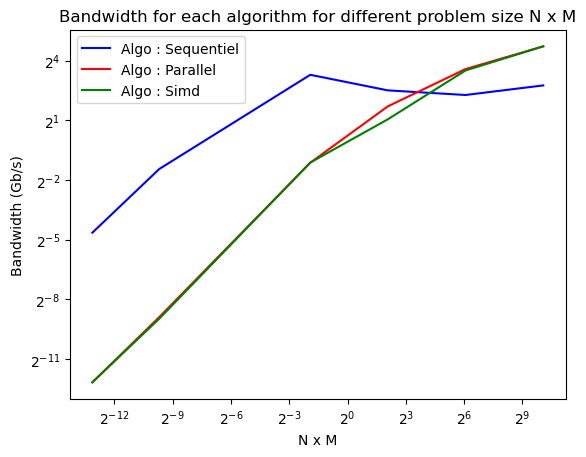

In [7]:
for algo in algo_compare:
    df_algo = df[df['version'] == algo]
    mean = df_algo.groupby(['problemSize']).mean().reset_index()
    plt.plot(mean['problemSize'], mean['bandwith'], color=color_algo[algo], label="Algo : " + str(algo))
    
plt.legend()
plt.title("Bandwidth for each algorithm for different problem size N x M") 
plt.xlabel("N x M")
plt.ylabel("Bandwidth (Gb/s)")
plt.yscale('log', base=2)
plt.xscale('log', base=2)
plt.show()

Le graphique confirme les conclusions que nous avons faites sur la partie précédante.On voit que l'accès aux données est plus rapide pour l'algorithme séquentiel pour des petits volumes de données et que l'algorithme parallèle est plus rapide pour des plus grands volumes de données.  